# 第２回 　機械学習（分類）評価と応用

## 2-1. ライブラリの読み込み

In [1]:
# OS（オペレーティングシステム）に依存した機能を使うための標準ライブラリ
import os
#os.getcwd() # 現在のディレクトリを返す

In [2]:
# Library の読み込み
import sys # Pythonのインタプリタや実行環境に関する情報を扱うためのライブラリ
import pandas as pd # データを扱うための標準的なライブラリ
import numpy as np # 多次元配列を扱う数値演算ライブラリ
import scipy as sp # 高度な科学計算を行うためのライブラリ
import sklearn # 機械学習のライブラリ
import matplotlib.pyplot as plt # グラフを描画するライブラリ
%matplotlib inline
# jupyter内に描画

## 2-2. データファイルの読み込みとデータの分割

In [3]:
# CSVファイルの読み込み
df = pd.read_csv("data/pulsar_stars.csv") # df = data frame の略
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
df.shape # pandas の dataframe の行と列の表示

(17898, 9)

In [5]:
# データの分割（学習データと検証データ）

from sklearn.model_selection import train_test_split

# 説明変数
X = pd.DataFrame(df.drop("target_class", axis=1))  # Pythonのコーディングでは、説明変数を大文字のXに設定することが多い

# 目的変数
y = pd.DataFrame(df.target_class) # pd.DataFrame(df["target_class"]) でも良い

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=1) # X_test, y_test と設定することも多い

In [6]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3) # clf: classifier（分類器） の略
clf = clf.fit(X_train, y_train)
acc = clf.score(X_val, y_val)
print("Open Accuracy:", acc)

Open Accuracy: 0.976536312849162


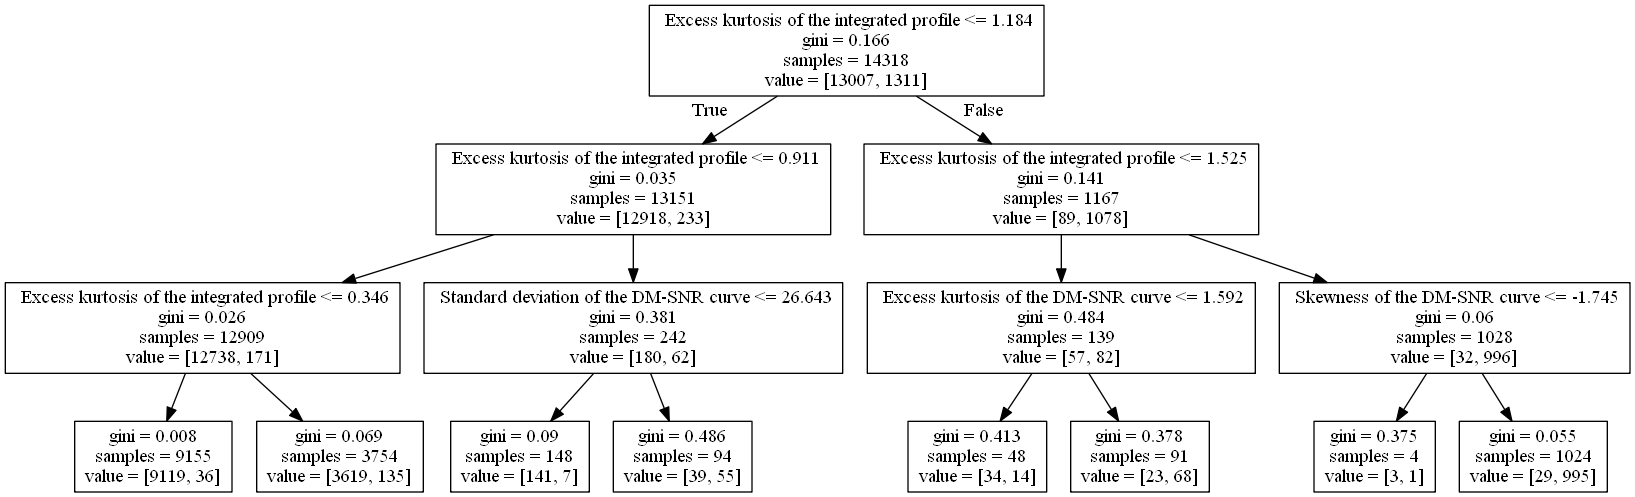

In [11]:
# 準備
# Windows 
# GraphViz をインストールする　https://www.graphviz.org/download/
# Mac
# /usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"
# brew install graphviz
# 共通
# conda install pydotplus
# conda install graphviz
# conda install -c conda-forge python-graphviz

#可視化
import pydotplus
from graphviz import Digraph
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,feature_names=X_train.columns, max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#dot.exeへのパスをdictで渡す
graph.progs = {'dot': u"C:\\Program Files\\graphviz-2.38\\bin\\dot.exe"}

graph.write_jpg("graph.jpg")
Image(graph.create_png())

## 2-3. 機械学習 → 検証 → 結果表示関数作成

In [12]:
# 機械学習 → 検証 → 結果表示関数
def model_fit(clf, X_train, y_train, X_val, y_val): # 同じコードの重複を避けるため、関数を定義
    # モデルの学習
    clf = clf.fit(X_train, y_train)
    # 検証データで予測
    y_pred = pd.DataFrame(clf.predict(X_val))
    # confusion matrix（混合行列）表示
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_val, y_pred)
    print(cm)
    acc = clf.score(X_val, y_val)
    # 横軸が予想(predicted)、縦軸が実際(actual)
    print("Open Accuracy:", acc)
    
    return acc

## 2-4. アルゴリズム（分類器）のスクリーニング

In [13]:
# 決定木
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3) # clf: classifier（分類器） の略

# 学習 → 検証の関数
dt_acc = model_fit(clf, X_train, y_train, X_val, y_val)  # 関数の呼び出し

[[3226   26]
 [  58  270]]
Open Accuracy: 0.976536312849162


In [14]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(min_samples_leaf=3, random_state=0) # clf: classifier（分類器） の略
rf_acc = model_fit(clf, X_train, y_train, X_val, y_val)  # 関数の呼び出し

C:\Users\iiats\Anaconda3\envs\Python36-gpu\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[[3230   22]
 [  56  272]]
Open Accuracy: 0.9782122905027933


In [15]:
# サポートベクターマシーン
from sklearn.svm import SVC
# clf = SVC(kernel='linear', random_state=None) # 線形
clf = SVC(kernel='rbf', gamma=0.0001) # 非線形
svm_acc = model_fit(clf, X_train, y_train, X_val, y_val)  # 関数の呼び出し

C:\Users\iiats\Anaconda3\envs\Python36-gpu\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[3240   12]
 [  81  247]]
Open Accuracy: 0.9740223463687151


In [16]:
# ニューラルネットワーク
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver="sgd",random_state=0,max_iter=10000) # clf: classifier（分類器） の略
nn_acc = model_fit(clf, X_train, y_train, X_val, y_val)  # 関数の呼び出し

C:\Users\iiats\Anaconda3\envs\Python36-gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[3229   23]
 [  56  272]]
Open Accuracy: 0.9779329608938547


In [17]:
# 勾配ブースティング分類
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=10) # clf: classifier（分類器） の略
gbc_acc = model_fit(clf, X_train, y_train, X_val, y_val)  # 関数の呼び出し

C:\Users\iiats\Anaconda3\envs\Python36-gpu\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[3223   29]
 [  55  273]]
Open Accuracy: 0.976536312849162


In [18]:
# k近傍法
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10) # clf: classifier（分類器） の略
knn_acc = model_fit(clf, X_train, y_train, X_val, y_val)  # 関数の呼び出し

C:\Users\iiats\Anaconda3\envs\Python36-gpu\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


[[3235   17]
 [  75  253]]
Open Accuracy: 0.9743016759776536


In [19]:
# ５種類の分類器の結果比較
print("DT： ", dt_acc)
print("RF： ", rf_acc)
print("SVM：", svm_acc)
print("NN： ", nn_acc)
print("GBC：", gbc_acc)
print("kNN：", knn_acc)

DT：  0.976536312849162
RF：  0.9782122905027933
SVM： 0.9740223463687151
NN：  0.9779329608938547
GBC： 0.976536312849162
kNN： 0.9743016759776536


## 2-5. 検証結果の詳細

In [20]:
# 一番精度が高かったランダムフォレストで検証結果表示

# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(min_samples_leaf=3, random_state=0) # clf: classifier（分類器） の略

model_fit(clf, X_train, y_train, X_val, y_val)  # 関数の呼び出し

C:\Users\iiats\Anaconda3\envs\Python36-gpu\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[[3230   22]
 [  56  272]]
Open Accuracy: 0.9782122905027933


0.9782122905027933

Confusion Matrix
------------------
[[3230   22]
 [  56  272]]
------------------


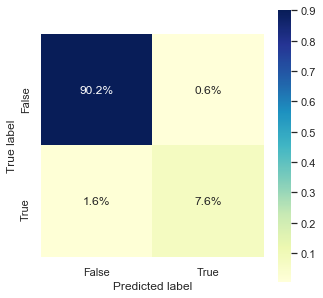

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.set()

y_pred =  pd.DataFrame(clf.predict(X_val))

# 混合行列を作成する。
cm = confusion_matrix(y_val, y_pred)
cm_rate = cm / cm.sum()

# 混合行列を描画する。
def print_confusion_matrix(confusion_matrix, class_names):
    fig = plt.figure(figsize=(5, 5))
    heatmap = sns.heatmap(
        confusion_matrix, xticklabels=class_names, yticklabels=class_names,
        annot=True, fmt='.1%', cbar=True, square=True, cmap='YlGnBu')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

labels = ["False","True"]

print("Confusion Matrix")
print("------------------")
print(cm)
print("------------------")

print_confusion_matrix(cm_rate, labels)

# 縦軸の表示がおかしいのは matplotlib 3.1.1 のバグ
# https://teratail.com/questions/205195

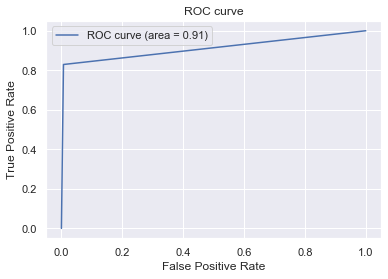

In [22]:
# ROC曲線とAUC (Area Under Curve) 

# FPR（偽陽性率）とTPR（真陽性率）, 閾値 を算出,
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)

# ついでにAUCも
auc = metrics.auc(fpr, tpr)

# ROC曲線をプロット

plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [23]:
from sklearn.metrics import classification_report

# Generate a classification report
y_pred = clf.predict(X_val)
report = classification_report(y_val, y_pred, target_names=['False','True'])

#sklearn.metrics.classification_report(y_true, y_pred,
#    labels=None, target_names=None, 
#    sample_weight=None, digits=2)

print(report)

              precision    recall  f1-score   support

       False       0.98      0.99      0.99      3252
        True       0.93      0.83      0.87       328

    accuracy                           0.98      3580
   macro avg       0.95      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580



In [24]:
# 交差検証
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=5)
print('Cross-validation scores: \n{}'.format(cross_val_score(clf, X, y, cv=kfold)))

C:\Users\iiats\Anaconda3\envs\Python36-gpu\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\iiats\Anaconda3\envs\Python36-gpu\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\iiats\Anaconda3\envs\Python36-gpu\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\iiats\Anaconda3\envs\Python36-gpu\lib\site-packages\sklearn\model_s

Cross-validation scores: 
[0.97234637 0.97877095 0.97821229 0.97960324 0.98882369]
